# Machine Learning - FYP

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import drive

####2) LSTM RNN architecture to predict timeseries data
a) Forming sequences to predict data using only 1 parameter (univariate)

Reading the file and extracting the data

In [12]:
# Reading file

drive.mount('/content/gdrive')
data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/dataset.xlsx')

# Reading dataset and separating input features (X) and target labels (y)
X = data.iloc[:1000,5]  # Input features

print(X)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
0      2.430277
1      2.428745
2      2.428366
3      2.427997
4      2.427640
         ...   
995    2.344677
996    2.344657
997    2.344638
998    2.344618
999    2.344598
Name: V_cur, Length: 1000, dtype: float64


Scaling and training dataset

In [26]:
# Prepare data into sequences
sequence_length = 100  # Number of time steps per sequence
sequences = []
for i in range(len(X) - sequence_length):
    sequences.append(X[i:i+sequence_length])

sequences = np.array(sequences)

# Each scaled sequences
scaled_sequences = []
scaler = MinMaxScaler()

# Scale each sequence individually
for sequence in sequences:
    sequence_scaled = scaler.fit_transform(sequence.reshape(-1, 1))
    scaled_sequences.append(sequence_scaled)

scaled_sequences = np.array(scaled_sequences)

print(scaled_sequences)

# Split data into training and test sets and apply scaling
X_train, X_test = train_test_split(scaled_sequences, test_size=0.2, shuffle=False)
# X_train_scaled = X_train # No scaling

# print(X_train_scaled)


[[[1.        ]
  [0.94100364]
  [0.92642773]
  ...
  [0.02549682]
  [0.0125848 ]
  [0.        ]]

 [[1.        ]
  [0.98470969]
  [0.96983017]
  ...
  [0.02607697]
  [0.01287536]
  [0.        ]]

 [[1.        ]
  [0.98507982]
  [0.97060415]
  ...
  [0.02550975]
  [0.01259921]
  [0.        ]]

 ...

 [[1.        ]
  [0.98956983]
  [0.97914726]
  ...
  [0.01963051]
  [0.00981271]
  [0.        ]]

 [[1.        ]
  [0.98957094]
  [0.97914946]
  ...
  [0.01963256]
  [0.00981374]
  [0.        ]]

 [[1.        ]
  [0.98957205]
  [0.97915165]
  ...
  [0.01963462]
  [0.00981478]
  [0.        ]]]


Model

In [34]:
# RNN model
model = Sequential()
model.add(LSTM(300, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
# model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
X_train_reshaped = X_train.reshape(-1, sequence_length, 1)  # reshapes the training input data X_train_scaled into a 3D array with dimensions (batch_size, sequence_length, input_features)
y_train = X_train[:, -1]  # Predict the next value in the sequence based on last value in each sequence
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)

Epoch 1/10
23/23 [==============================] - 5s 162ms/step - loss: 1.5659e-04
Epoch 2/10
23/23 [==============================] - 5s 224ms/step - loss: 9.1775e-06
Epoch 3/10
23/23 [==============================] - 4s 164ms/step - loss: 8.0312e-07
Epoch 4/10
23/23 [==============================] - 4s 169ms/step - loss: 7.3781e-08
Epoch 5/10
23/23 [==============================] - 4s 190ms/step - loss: 9.5714e-09
Epoch 6/10
23/23 [==============================] - 5s 230ms/step - loss: 3.3331e-09
Epoch 7/10
23/23 [==============================] - 4s 163ms/step - loss: 2.2786e-09
Epoch 8/10
23/23 [==============================] - 4s 179ms/step - loss: 1.8987e-09
Epoch 9/10
23/23 [==============================] - 5s 214ms/step - loss: 1.6292e-09
Epoch 10/10
23/23 [==============================] - 4s 163ms/step - loss: 1.4049e-09


Predicting next timesteps

In [35]:
# Predict the remaining data (adjust as needed)
num_predictions = len(X) - len(X_train)
predicted_data = []

# Start with the last sequence from the training data
current_sequence = X_train[-1, :, np.newaxis]

for _ in range(num_predictions):
    # Predict the next value in the sequence
    next_value = model.predict(current_sequence[np.newaxis, :, :])

    # Append the predicted value to the result
    predicted_data.append(next_value[0, 0])

    # Update the current sequence for the next prediction
    current_sequence = np.roll(current_sequence, shift=-1, axis=0)
    current_sequence[-1] = next_value[0, 0]

print(predicted_data)

1/1 [==============================] - 0s 50ms/step
[array([0.00021635], dtype=float32), array([0.00021591], dtype=float32), array([0.00021539], dtype=float32), array([0.00021478], dtype=float32), array([0.00021409], dtype=float32), array([0.0002133], dtype=float32), array([0.00021243], dtype=float32), array([0.00021147], dtype=float32), array([0.00021043], dtype=float32), array([0.00020931], dtype=float32), array([0.00020809], dtype=float32), array([0.00020679], dtype=float32), array([0.0002054], dtype=float32), array([0.00020393], dtype=float32), array([0.00020238], dtype=float32), array([0.00020074], dtype=float32), array([0.00019902], dtype=float32), array([0.00019722], dtype=float32), array([0.00019533], dtype=float32), array([0.00019336], dtype=float32), array([0.0001913], dtype=float32), array([0.00018917], dtype=float32), array([0.00018695], dtype=float32), array([0.00018464], dtype=float32), array([0.00018226], dtype=float32), array([0.0001798], dtype=float32), array([0.000177

Plotting

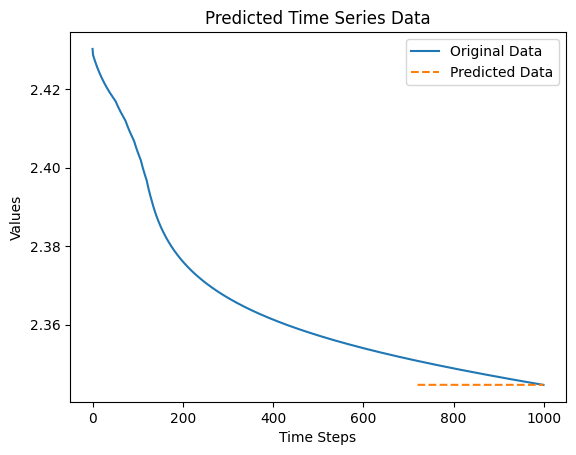

In [36]:
# Inverse transform the predicted data to get it back to the original scale
predicted_data = scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))

# Visualize the predicted time series data
plt.plot(X, label='Original Data')
plt.plot(range(len(X_train), len(X_train)+num_predictions), predicted_data, label='Predicted Data', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.title('Predicted Time Series Data')
plt.show()